In [0]:
#ASSEMBLE THE AUTOENCODER ARCHITECTURE

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

input_img = Input(shape=(320, 480, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



W0705 08:35:49.523426 139663748065152 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0705 08:35:49.795057 139663748065152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#PREPARE DATA FOR TRAINING AND VALIDATION

import os 
import cv2
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

folder="/content/gdrive/My Drive/preprocessed2"
files = os.listdir("/content/gdrive/My Drive/preprocessed2")
print(len(files))

x_train = []


for file in files[:1200]:
    image = np.array(cv2.imread(os.path.join(folder, file)))
    if image.shape == (320, 480, 3):
        x_train.append(image)
    
x_train = np.stack(x_train)
print(x_train.shape)
x_test = []


for file in files[1200:]:
    image = np.array(cv2.imread(os.path.join(folder, file)))
    if image.shape == (320, 480, 3):
        x_test.append(image)
    
x_test = np.stack(x_test)
print(x_test.shape)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
1294
(1198, 320, 480, 3)
(94, 320, 480, 3)


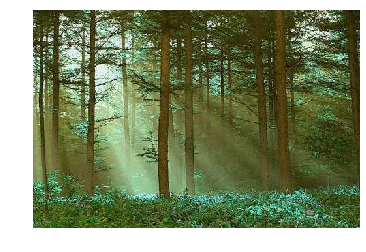

In [0]:
import matplotlib.pyplot as plt


plt.imshow(np.reshape(x_test[28], (320, 480, 3)))
plt.axis('off')
plt.show()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [0]:
#TRAIN THE MODEL

print(autoencoder.summary())
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=8,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 320, 480, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 320, 480, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 160, 240, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 240, 8)       1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 120, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 120, 8)        584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 60, 8)         0     

In [0]:
!ls / sample_data

/:
bin	 datalab  home	 lib64	opt   run   swift		tmp    var
boot	 dev	  lib	 media	proc  sbin  sys			tools
content  etc	  lib32  mnt	root  srv   tensorflow-2.0.0b1	usr

sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


[[[[0.598136   0.57348573 0.5594834 ]
   [0.61939293 0.6130139  0.55756   ]
   [0.56004936 0.56884754 0.546408  ]
   ...
   [0.32687137 0.37276906 0.35987484]
   [0.30383968 0.38918662 0.36949402]
   [0.34548083 0.42242265 0.38129446]]

  [[0.59335023 0.5545999  0.5442664 ]
   [0.6090549  0.6005129  0.5637351 ]
   [0.537754   0.54952013 0.5204574 ]
   ...
   [0.30545944 0.36022717 0.34251747]
   [0.31126505 0.3795135  0.3668751 ]
   [0.30773127 0.38550228 0.357306  ]]

  [[0.5438766  0.529675   0.51824677]
   [0.559506   0.5552441  0.5380437 ]
   [0.5121804  0.5104128  0.48885742]
   ...
   [0.3145614  0.3874668  0.34590408]
   [0.31360483 0.3890936  0.35987735]
   [0.32079226 0.39643145 0.36635226]]

  ...

  [[0.11102214 0.23180398 0.2695813 ]
   [0.06473103 0.20762473 0.23242617]
   [0.06378826 0.21430078 0.22719109]
   ...
   [0.19507888 0.42038816 0.46227258]
   [0.2021696  0.39587376 0.44607636]
   [0.25938907 0.39558932 0.391807  ]]

  [[0.14572078 0.2734788  0.28634357]
   [0.0

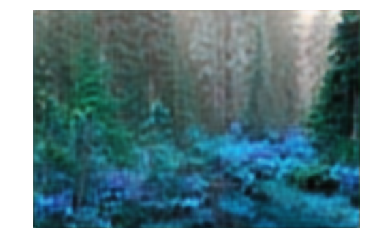

In [0]:


i = 42
result = autoencoder.predict(x_test[i:i+1])

print(result)
plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()




In [0]:
#from keras.models import load_model
#autoencoder=load_model('/content/gdrive/My Drive/ae.h5')
autoencoder.save('/content/gdrive/My Drive/ae.h5')

In [0]:
#RESET TO DEFAULTS

autoencoder.get_layer('conv2d_6').set_weights(old_weights6)
autoencoder.get_layer('conv2d_5').set_weights(old_weights5)
autoencoder.get_layer('conv2d_4').set_weights(old_weights4)
autoencoder.get_layer('conv2d_3').set_weights(old_weights3)
autoencoder.get_layer('conv2d_2').set_weights(old_weights2)
autoencoder.get_layer('conv2d_1').set_weights(old_weights1)


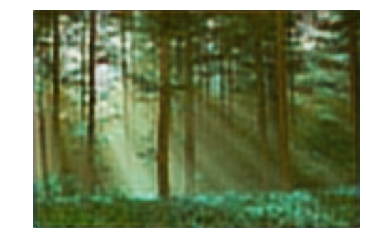

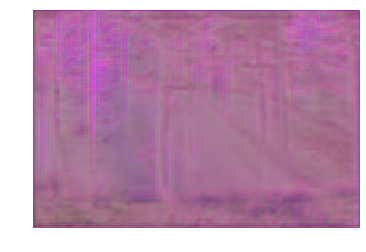

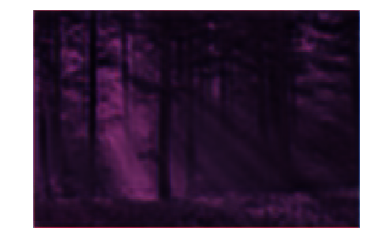

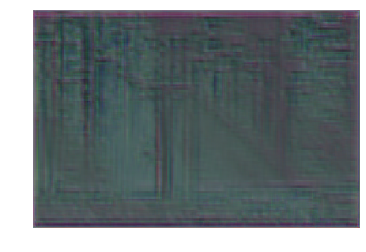

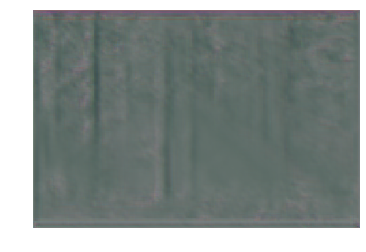

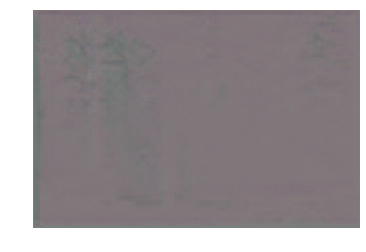

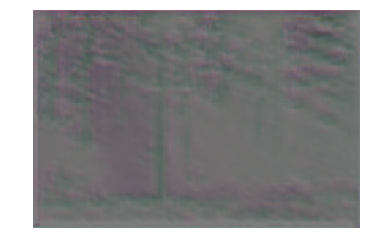

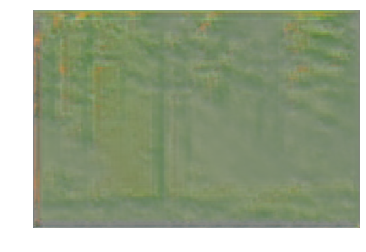

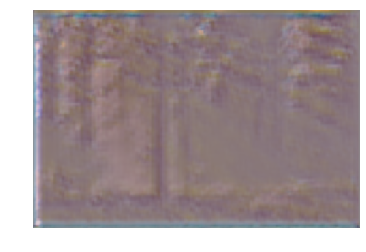

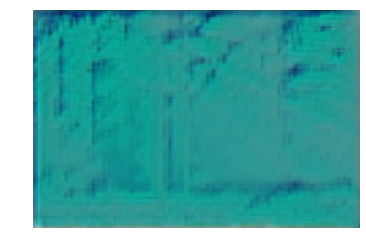

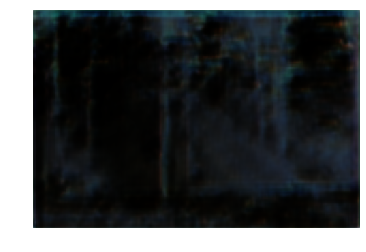

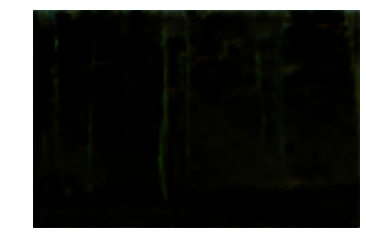

In [0]:
#CHOOSE AN IMAGE AND VISUALIZE PREDICTIONS WITH PERTURBED LAYERS


i=28

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()


old_weights6= autoencoder.get_layer('conv2d_6').get_weights()
new_weights1 = np.zeros(old_weights6[0].shape)
new_weights2 = np.zeros(old_weights6[1].shape)
noise_weights1 = np.random.normal(loc=0.0, scale=np.std(old_weights6[0]), size=old_weights6[0].shape)
noise_weights2 = np.random.normal(loc=0.0, scale=np.std(old_weights6[1]), size=old_weights6[1].shape)

new_weights=[new_weights1+noise_weights1, new_weights2+noise_weights2]
autoencoder.get_layer('conv2d_6').set_weights(new_weights)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

#autoencoder.get_layer('conv2d_6').set_weights(old_weights)


old_weights5= autoencoder.get_layer('conv2d_5').get_weights()
new_weights1 = np.zeros(old_weights5[0].shape)
new_weights2 = np.zeros(old_weights5[1].shape)
noise_weights1 = np.random.normal(loc=0.0, scale=np.std(old_weights5[0]), size=old_weights5[0].shape)
noise_weights2 = np.random.normal(loc=0.0, scale=np.std(old_weights5[1]), size=old_weights5[1].shape)

new_weights=[new_weights1+noise_weights1, new_weights2+noise_weights2]
autoencoder.get_layer('conv2d_5').set_weights(new_weights)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

#autoencoder.get_layer('conv2d_5').set_weights(old_weights)


old_weights4= autoencoder.get_layer('conv2d_4').get_weights()
new_weights1 = np.zeros(old_weights4[0].shape)
new_weights2 = np.zeros(old_weights4[1].shape)
noise_weights1 = np.random.normal(loc=0.0, scale=np.std(old_weights4[0]), size=old_weights4[0].shape)
noise_weights2 = np.random.normal(loc=0.0, scale=np.std(old_weights4[1]), size=old_weights4[1].shape)

new_weights=[new_weights1+noise_weights1, new_weights2+noise_weights2]
autoencoder.get_layer('conv2d_4').set_weights(new_weights)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

#autoencoder.get_layer('conv2d_4').set_weights(old_weights)

old_weights3= autoencoder.get_layer('conv2d_3').get_weights()
new_weights1 = np.zeros(old_weights3[0].shape)
new_weights2 = np.zeros(old_weights3[1].shape)
noise_weights1 = np.random.normal(loc=0.0, scale=np.std(old_weights3[0]), size=old_weights3[0].shape)
noise_weights2 = np.random.normal(loc=0.0, scale=np.std(old_weights3[1]), size=old_weights3[1].shape)

new_weights=[new_weights1+noise_weights1, new_weights2+noise_weights2]
autoencoder.get_layer('conv2d_3').set_weights(new_weights)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

#autoencoder.get_layer('conv2d_3').set_weights(old_weights)

old_weights2= autoencoder.get_layer('conv2d_2').get_weights()
new_weights1 = np.zeros(old_weights2[0].shape)
new_weights2 = np.zeros(old_weights2[1].shape)
noise_weights1 = np.random.normal(loc=0.0, scale=np.std(old_weights2[0]), size=old_weights2[0].shape)
noise_weights2 = np.random.normal(loc=0.0, scale=np.std(old_weights2[1]), size=old_weights2[1].shape)

new_weights=[new_weights1+noise_weights1, new_weights2+noise_weights2]
autoencoder.get_layer('conv2d_2').set_weights(new_weights)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

#autoencoder.get_layer('conv2d_2').set_weights(old_weights)

old_weights1= autoencoder.get_layer('conv2d_1').get_weights()
new_weights1 = np.zeros(old_weights1[0].shape)
new_weights2 = np.zeros(old_weights1[1].shape)
noise_weights1 = np.random.normal(loc=0.0, scale=np.std(old_weights1[0]), size=old_weights1[0].shape)
noise_weights2 = np.random.normal(loc=0.0, scale=np.std(old_weights1[1]), size=old_weights1[1].shape)

new_weights=[new_weights1+noise_weights1, new_weights2+noise_weights2]
autoencoder.get_layer('conv2d_1').set_weights(new_weights)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

#autoencoder.get_layer('conv2d_1').set_weights(old_weights)

autoencoder.get_layer('conv2d_6').set_weights(old_weights6)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

autoencoder.get_layer('conv2d_5').set_weights(old_weights5)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

autoencoder.get_layer('conv2d_4').set_weights(old_weights4)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

autoencoder.get_layer('conv2d_3').set_weights(old_weights3)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

autoencoder.get_layer('conv2d_2').set_weights(old_weights2)

result = autoencoder.predict(x_test[i:i+1])

plt.imshow(np.reshape(result[0], (320, 480, 3)))
plt.axis('off')
plt.show()

autoencoder.get_layer('conv2d_1').set_weights(old_weights1)
